Embedding found


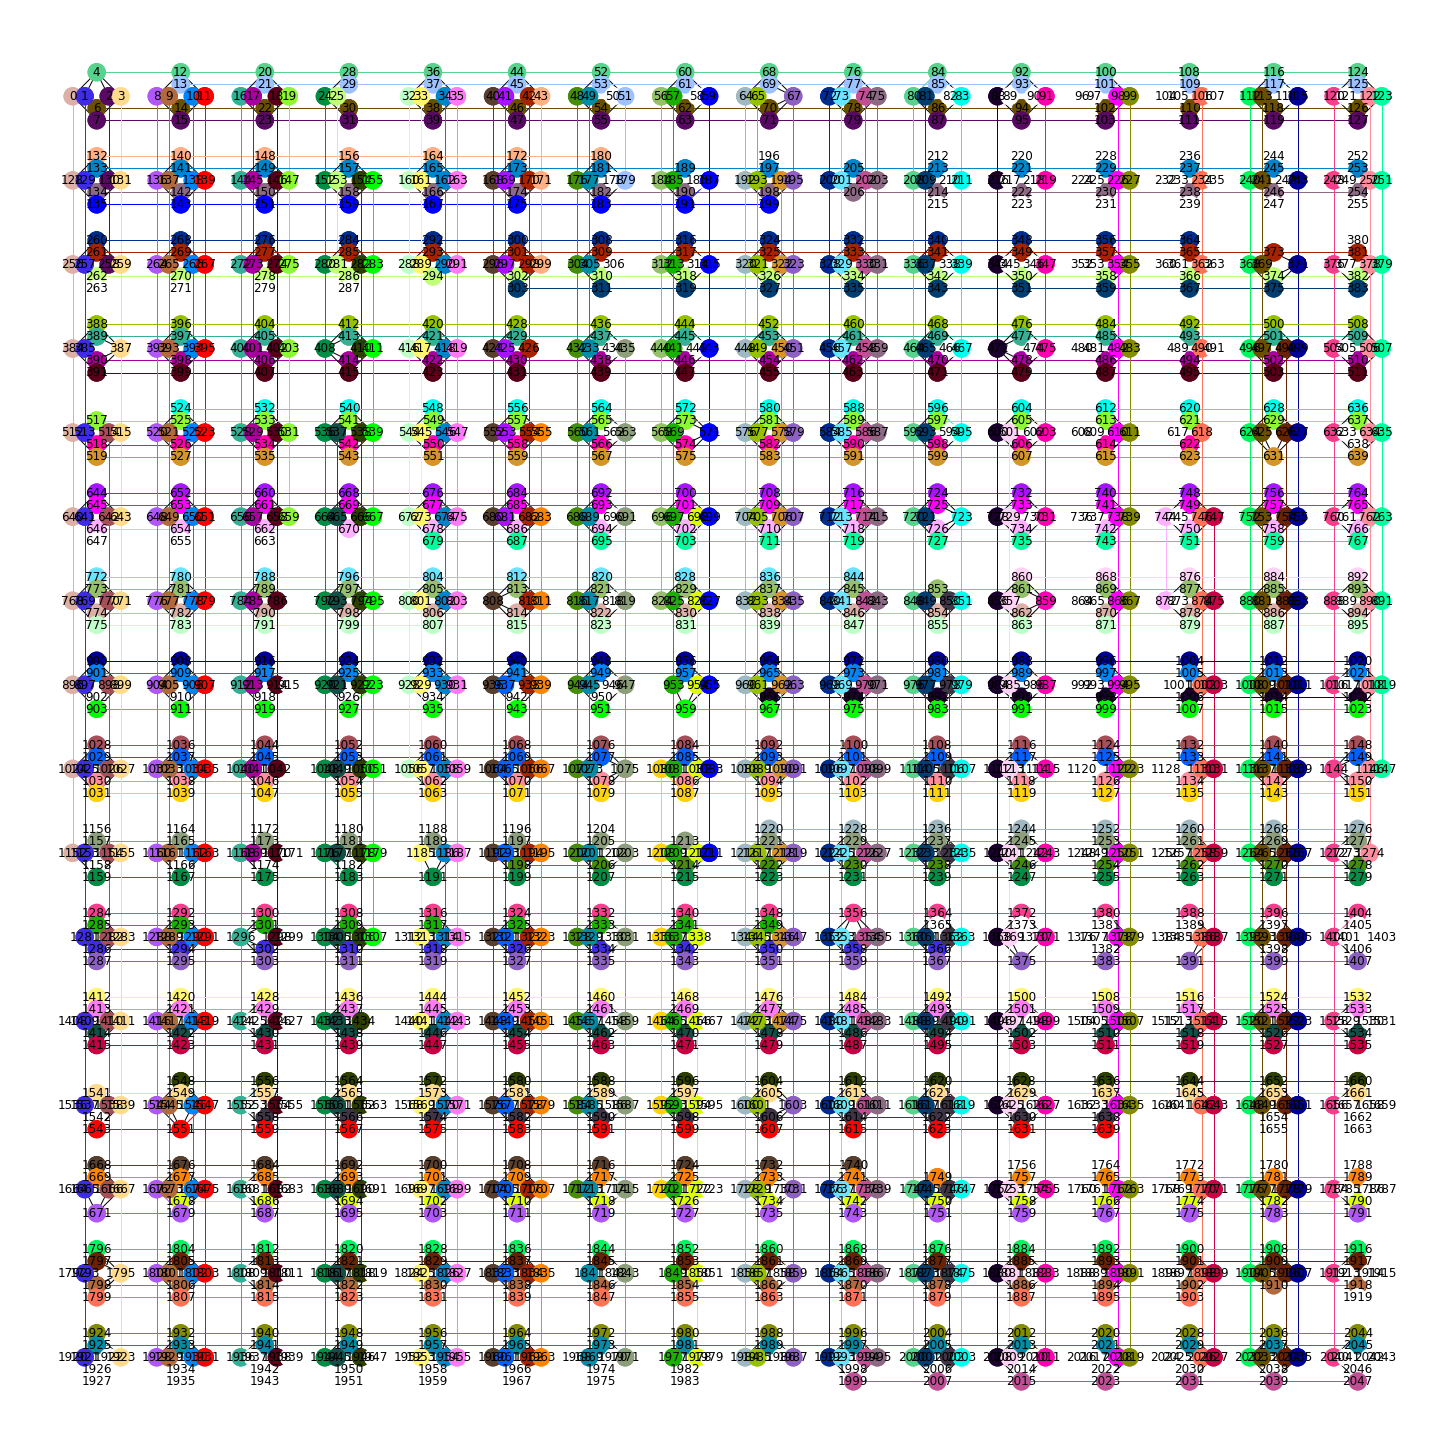

In [1]:
from ember.hardware.chimera import D_WAVE_2000Q
from ember.template import BipartiteSat
from ember.util import *
import networkx as nx

guest = nx.gnp_random_graph(64, 0.2)
host = D_WAVE_2000Q(node_fault_rate=0.03)

embedding = BipartiteSat(guest, host).solve()

check_embedding(embedding, guest, host)
plot_chimera_embedding(embedding, host)

Running C++
Embedding found


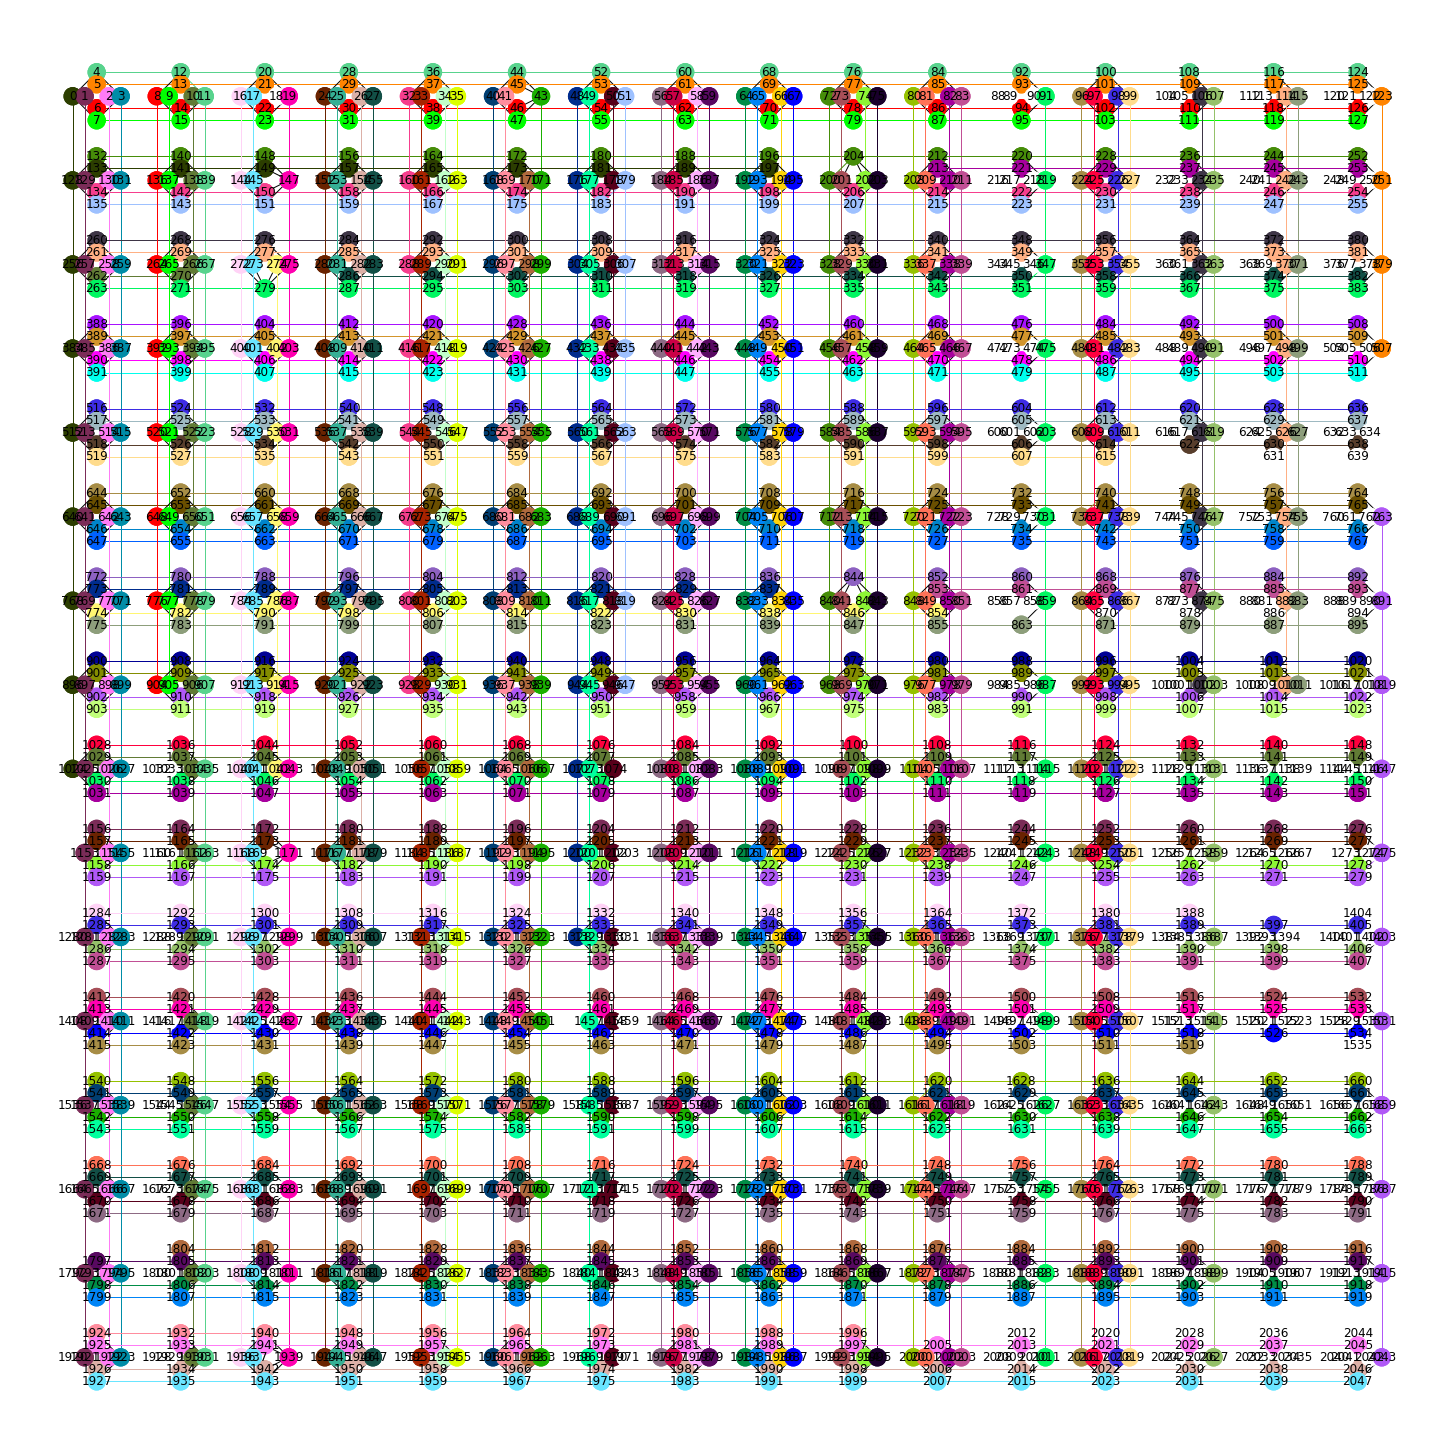

In [2]:
from ember.template import QuadripartiteSat

guest = nx.barabasi_albert_graph(68, 55)
host = D_WAVE_2000Q(node_fault_rate=0.01)

embedding = QuadripartiteSat(guest, host).solve()

check_embedding(embedding, guest, host)
plot_chimera_embedding(embedding, host)

Optimal: 639
Solution found
Embedding found


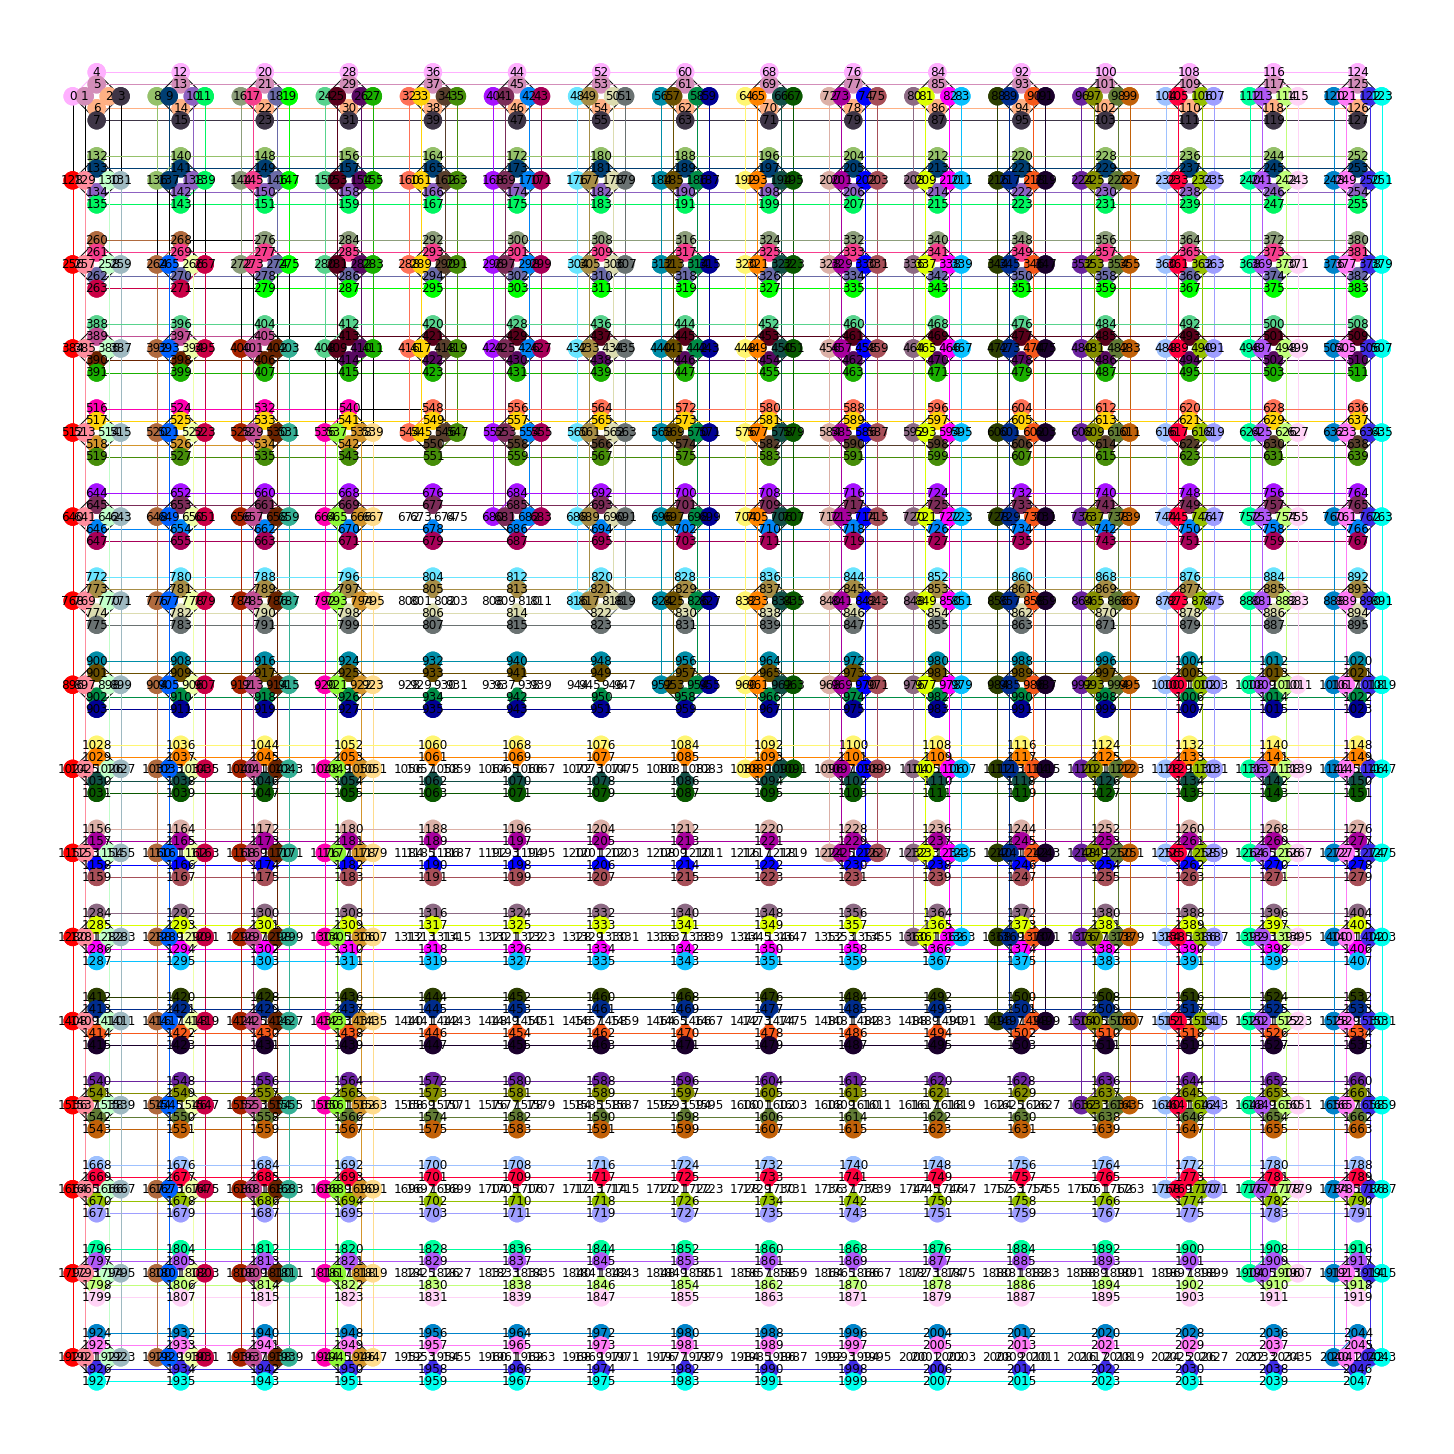

In [4]:
from ember.pssa.optimize import run_simulated_annealing
from ember.pssa.model import CliqueOverlapModel
import random

T_MAX = 10**6

def schedule(iter_count):
    progress_ratio = iter_count / T_MAX
    if 0 <= iter_count < (T_MAX // 2):
        temperature = 0.603 * (1 - 2 * progress_ratio)
    else:
        temperature = 0.334 * 2 * (1 - progress_ratio)
    shift = random.random() > ((0.3 * progress_ratio - 1) ** 2)
    return temperature, shift, None

guest = nx.gnp_random_graph(80, 0.2)
host = D_WAVE_2000Q()

model = CliqueOverlapModel(guest, host)

embedding = run_simulated_annealing(model, schedule, T_MAX)

check_embedding(embedding, guest, host)
plot_chimera_embedding(embedding, host)

